In [1]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 345.9 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=2513e14d8bff4eceeca7d4abd65514a17bebe07e639816bebd06dace89fa16e1
  Stored in directory: /root/.cache/pip/wheels/83/71/2b/40d17d21937fed496fb99145227eca8f20b4891240ff60c86f
Successfully built sentence_transformers


In [2]:
!python -m spacy download el_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 MB 10.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_md')


In [3]:
'''from shutil import copyfile

copyfile(src = "/kaggle/input/trainer-am/stratification.py", dst = "../working/stratification.py")
copyfile(src = "/kaggle/input/trainer-am/kfold.py", dst = "../working/kfold.py")
copyfile(src = "/kaggle/input/trainer-am/trainer.py", dst = "../working/trainer.py")
copyfile(src = "/kaggle/input/trainer-am/visualizations.py", dst = "../working/visualizations.py")'''

'../working/visualizations.py'

In [4]:
from trainer import Trainer

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
import matplotlib.pyplot as plt

# Setup

In [7]:
path = "/kaggle/input/iliad-sentiments/iliad_sentiments.csv"
target = "class"

In [8]:
scenarios = {
    "TF-IDF sem lematização": {"lemmatize": False, "sbert": False},
    "TF-IDF com lematização": {"lemmatize": True, "sbert": False},
    "SBERT sem lematização": {"lemmatize": False, "sbert": True},
           }

classifiers = {
    "Decision Tree": DecisionTreeClassifier(), 
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

STANDARD = "Sem modificação"
WITHOUT_NARRATOR = "Sem narrador"
MERGE_NARRATOR_NEUTRAL = "Junção de narrador e neutro"

data_operations = [STANDARD, WITHOUT_NARRATOR, MERGE_NARRATOR_NEUTRAL]

nro_folds = 5

# Trainer

In [9]:
metrics = {}

for classifier in classifiers:  
    metrics[classifier] = {}
        
    for scenario in scenarios: 
        metrics[classifier][scenario] = {}

for classifier in classifiers:       
    for scenario in scenarios: 
        for operation in data_operations:
            trainer = Trainer(path, target)

            if operation == STANDARD:
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
            if operation == WITHOUT_NARRATOR:
                trainer.remove_class(["narrator"])
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
            elif operation == MERGE_NARRATOR_NEUTRAL:
                trainer.merge_class(["narrator"], "neutral")
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
                
            metrics[classifier][scenario][operation] = trainer.cross_validation(model=classifiers[classifier], nro_folds=nro_folds)
            print(f"{classifier} : {scenario} : {operation}")
            print(metrics[classifier][scenario][operation])
            print("=======================")


Decision Tree : TF-IDF sem lematização : Sem modificação
{'accuracy': [44, 61, 51, 53, 50], 'recall': [36.936564223798264, 49.66328783621036, 34.71886108832376, 36.308278643697015, 42.93185280675026], 'precision': [37.86399935468258, 49.084691903840834, 37.647782656951215, 39.996246246246244, 39.95148856990962], 'f1': [37.07207207207207, 47.904761118646896, 35.95398013594281, 36.26939539860888, 41.05429292929293]}
Decision Tree : TF-IDF sem lematização : Sem narrador
{'accuracy': [42, 47, 49, 42, 42], 'recall': [34.000525348043084, 35.704536330790845, 34.80357305623918, 30.592471060067457, 29.98554631040275], 'precision': [33.024976873265494, 35.88915792305623, 34.136752136752136, 29.92862992862993, 30.561728395061728], 'f1': [33.12208979811393, 35.70206269257025, 34.362669915143336, 29.448234402362843, 29.93645189761695]}
Decision Tree : TF-IDF sem lematização : Junção de narrador e neutro
{'accuracy': [49, 57, 52, 56, 51], 'recall': [36.89370838615365, 43.5184053898382, 38.6245556467

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

Decision Tree : SBERT sem lematização : Sem modificação
{'accuracy': [51, 50, 40, 40, 49], 'recall': [38.114657210401894, 35.19930081627191, 23.721117035821713, 28.907916324856437, 27.3921832884097], 'precision': [36.515731292517, 33.89552476508998, 23.753626692456482, 27.773809523809522, 28.148835291692432], 'f1': [37.14756146028502, 33.81905851585485, 23.686069754618142, 28.155479903052715, 27.60139717851329]}


Batches:   0%|          | 0/18 [00:00<?, ?it/s]

Decision Tree : SBERT sem lematização : Sem narrador
{'accuracy': [53, 58, 46, 48, 49], 'recall': [38.224323614394535, 41.190062000981314, 34.318658280922435, 35.576519916142566, 36.618617914762304], 'precision': [38.48717948717948, 42.571271929824555, 34.50980392156862, 36.48749533407988, 37.55388680294813], 'f1': [38.26358826358827, 41.03794498433366, 34.259941089838, 35.92156862745098, 36.9563838223632]}


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

Decision Tree : SBERT sem lematização : Junção de narrador e neutro
{'accuracy': [53, 47, 45, 53, 60], 'recall': [43.05855346558399, 36.66707392991581, 35.329505058791355, 40.06140154622517, 46.52347925522659], 'precision': [41.73366316223459, 36.35018441219991, 34.950180538415836, 40.26303854875283, 46.666666666666664], 'f1': [41.76587301587302, 36.44662018493794, 34.96738901746266, 40.128023830178286, 46.29725859183857]}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN : TF-IDF sem lematização : Sem modificação
{'accuracy': [51, 47, 46, 43, 43], 'recall': [33.18311662726556, 34.82102234711628, 23.205496308449547, 25.854012852064535, 28.9449783194656], 'precision': [49.761198945981555, 51.35467980295567, 27.048494983277592, 49.744897959183675, 53.89957264957265], 'f1': [39.375, 38.32907281695875, 24.979203802733217, 30.342870360485392, 35.07355787843593]}
KNN : TF-IDF sem lematização : Sem narrador
{'accuracy': [53, 47, 50, 44, 43], 'recall': [36.43551352771211, 32.3573754404746, 33.64779874213837, 30.161334427126057, 30.518770264463456], 'precision': [48.82783882783883, 50.847457627118644, 37.00396825396825, 34.0, 41.61304161304162], 'f1': [40.44695263238631, 35.360962566844925, 35.24602460246024, 31.53870162297129, 33.05829903532099]}
KNN : TF-IDF sem lematização : Junção de narrador e neutro
{'accuracy': [57, 44, 51, 43, 46], 'recall': [43.86370644465001, 33.63878077019298, 37.995624829094886, 31.80823824794292, 34.98893777810923], 'precision':

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

KNN : SBERT sem lematização : Sem modificação
{'accuracy': [39, 42, 38, 54, 46], 'recall': [22.95557525610717, 26.20182657567242, 20.483319660924256, 34.342015313098166, 32.93536856908473], 'precision': [44.95798319327731, 35.73450134770889, 29.67948717948718, 50.024370790499816, 40.49107142857143], 'f1': [28.20422360863537, 29.686301579996933, 23.485468890442423, 37.158863545418164, 35.95261121856867]}


Batches:   0%|          | 0/18 [00:00<?, ?it/s]

KNN : SBERT sem lematização : Sem narrador
{'accuracy': [44, 43, 42, 60, 46], 'recall': [30.420278434462826, 28.489227887060082, 29.92252301522195, 42.87029441254216, 33.36263135278721], 'precision': [51.507936507936506, 32.801701222753856, 41.27906976744186, 58.883415435139575, 42.74074074074075], 'f1': [35.07578318683795, 30.151515151515152, 33.595981232150145, 44.30618401206637, 35.88223054515189]}


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

KNN : SBERT sem lematização : Junção de narrador e neutro
{'accuracy': [45, 45, 41, 61, 47], 'recall': [36.088555407087625, 32.12783411586058, 30.065627563576697, 48.61287195167425, 37.269744201655605], 'precision': [46.55973709058358, 40.688131313131315, 47.985347985347985, 57.714285714285715, 49.662173575217054], 'f1': [40.58976865428478, 34.97760703923107, 35.05860706010631, 52.10326953748007, 41.94761423275073]}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : TF-IDF sem lematização : Sem modificação
{'accuracy': [40, 32, 34, 32, 32], 'recall': [24.601063829787233, 25.925916633212896, 17.042657916324856, 16.242821985233796, 23.397398335872495], 'precision': [42.689393939393945, 69.58536585365854, 22.938530734632685, 25.098039215686274, 72.99679487179486], 'f1': [29.685185415707117, 35.180655111819064, 19.434343434343432, 19.63855421686747, 32.084195997239476]}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : TF-IDF sem lematização : Sem narrador
{'accuracy': [38, 34, 36, 36, 37], 'recall': [24.37614919884423, 25.21254293233418, 23.789991796554553, 25.861817518913497, 26.553771631704365], 'precision': [32.53968253968254, 48.42529604434366, 27.807486631016044, 47.85714285714286, 48.61310377809661], 'f1': [26.773618538324424, 30.300889124418536, 25.511197663096397, 30.816563981227695, 31.684397163120565]}
Random Forest : TF-IDF sem lematização : Junção de narrador e neutro
{'accuracy': [43, 31, 33, 30, 35], 'recall': [33.47038064891903, 22.841068426043908, 24.172819250751985, 21.884555149526438, 29.963705968628034], 'precision': [54.47467876039305, 54.01484480431849, 61.71497584541063, 53.82744495647721, 55.85218702865761], 'f1': [40.486205534749224, 29.907281962076482, 30.68413068413068, 28.94980694980695, 38.793103448275865]}
Random Forest : TF-IDF com lematização : Sem modificação
{'accuracy': [51, 48, 43, 45, 44], 'recall': [29.555752561071706, 32.21790111066506, 23.367001

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Random Forest : SBERT sem lematização : Sem modificação
{'accuracy': [34, 31, 19, 29, 17], 'recall': [19.64391252955083, 17.998544761140103, 9.53650533223954, 14.827727645611155, 8.8084495488105], 'precision': [58.75, 52.85714285714286, 22.764705882352942, 31.521739130434778, 22.42063492063492], 'f1': [27.725282779659675, 24.738052163425294, 13.4004884004884, 20.14683447749809, 12.647804054054054]}


Batches:   0%|          | 0/18 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Random Forest : SBERT sem lematização : Sem narrador
{'accuracy': [32, 35, 33, 37, 31], 'recall': [21.13212503283425, 22.976047102903788, 22.381733661471152, 24.801750068362047, 21.31528575334974], 'precision': [36.4024864024864, 34.49387491940683, 37.971014492753625, 39.282051282051285, 32.19481340923466], 'f1': [26.725450060357954, 26.92753623188406, 27.894654823126068, 30.240865482751584, 25.64561874906703]}


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : SBERT sem lematização : Junção de narrador e neutro
{'accuracy': [29, 27, 27, 26, 27], 'recall': [19.836456870067725, 18.4437889445482, 18.3210281651627, 17.787804211102, 18.22532130161334], 'precision': [54.57079152731327, 67.76556776556775, 29.223267154301634, 38.405797101449274, 39.61538461538461], 'f1': [27.42857142857143, 24.564425437554448, 22.5219638242894, 24.270531400966185, 24.94565912287431]}


# Visualizations 

In [10]:
from visualizations import compare_boxplot

===> 2 2
0 0
0 0 [[44, 61, 51, 53, 50], [42, 47, 49, 42, 42], [49, 57, 52, 56, 51]]
0 1
0 1 [[36.936564223798264, 49.66328783621036, 34.71886108832376, 36.308278643697015, 42.93185280675026], [34.000525348043084, 35.704536330790845, 34.80357305623918, 30.592471060067457, 29.98554631040275], [36.89370838615365, 43.5184053898382, 38.62455564670495, 44.893976682327796, 42.46898849031744]]
1 2
0 2 [[37.86399935468258, 49.084691903840834, 37.647782656951215, 39.996246246246244, 39.95148856990962], [33.024976873265494, 35.88915792305623, 34.136752136752136, 29.92862992862993, 30.561728395061728], [38.377419933490636, 45.01424501424502, 40.580808080808076, 46.23557984213722, 43.50104821802934]]
1 3
0 3 [[37.07207207207207, 47.904761118646896, 35.95398013594281, 36.26939539860888, 41.05429292929293], [33.12208979811393, 35.70206269257025, 34.362669915143336, 29.448234402362843, 29.93645189761695], [37.38095238095238, 44.051666490690884, 39.30613646925704, 44.89260534513855, 42.9438040437639]]


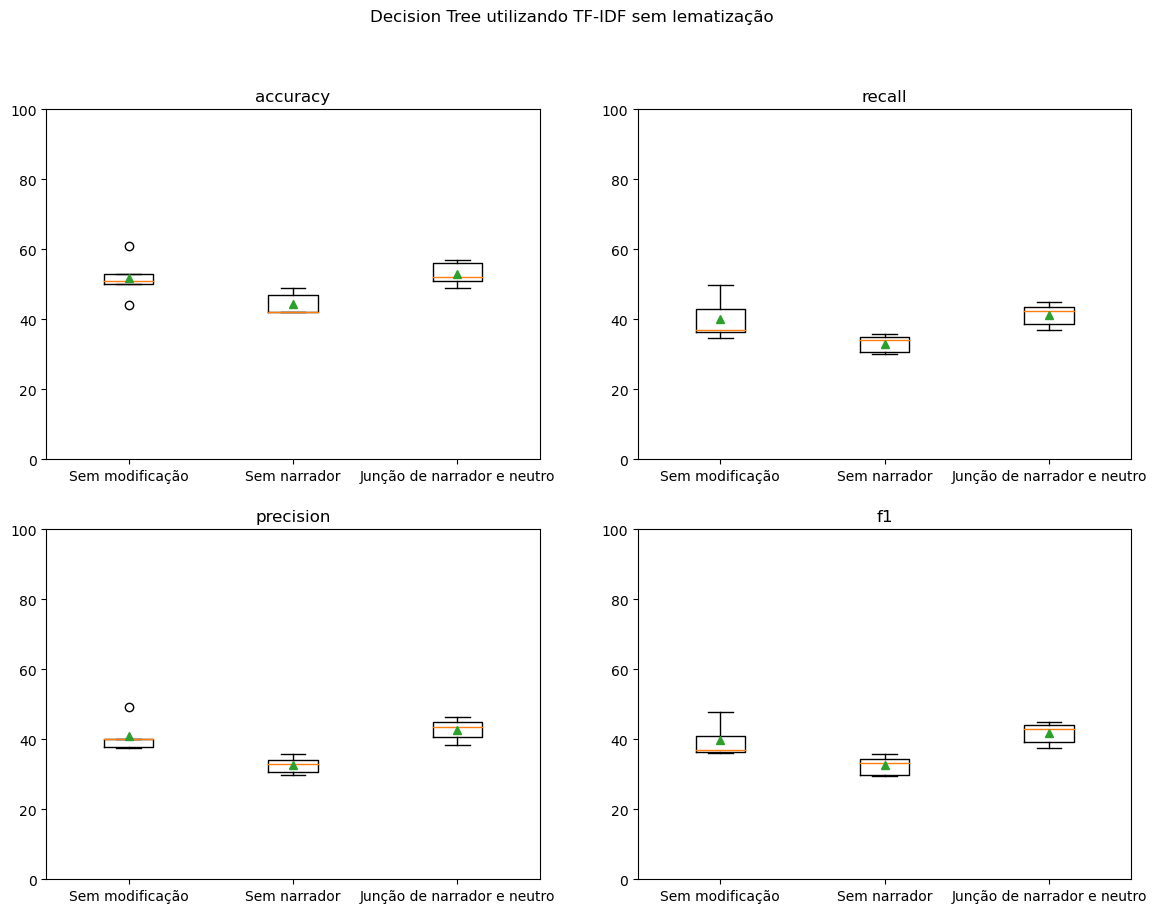

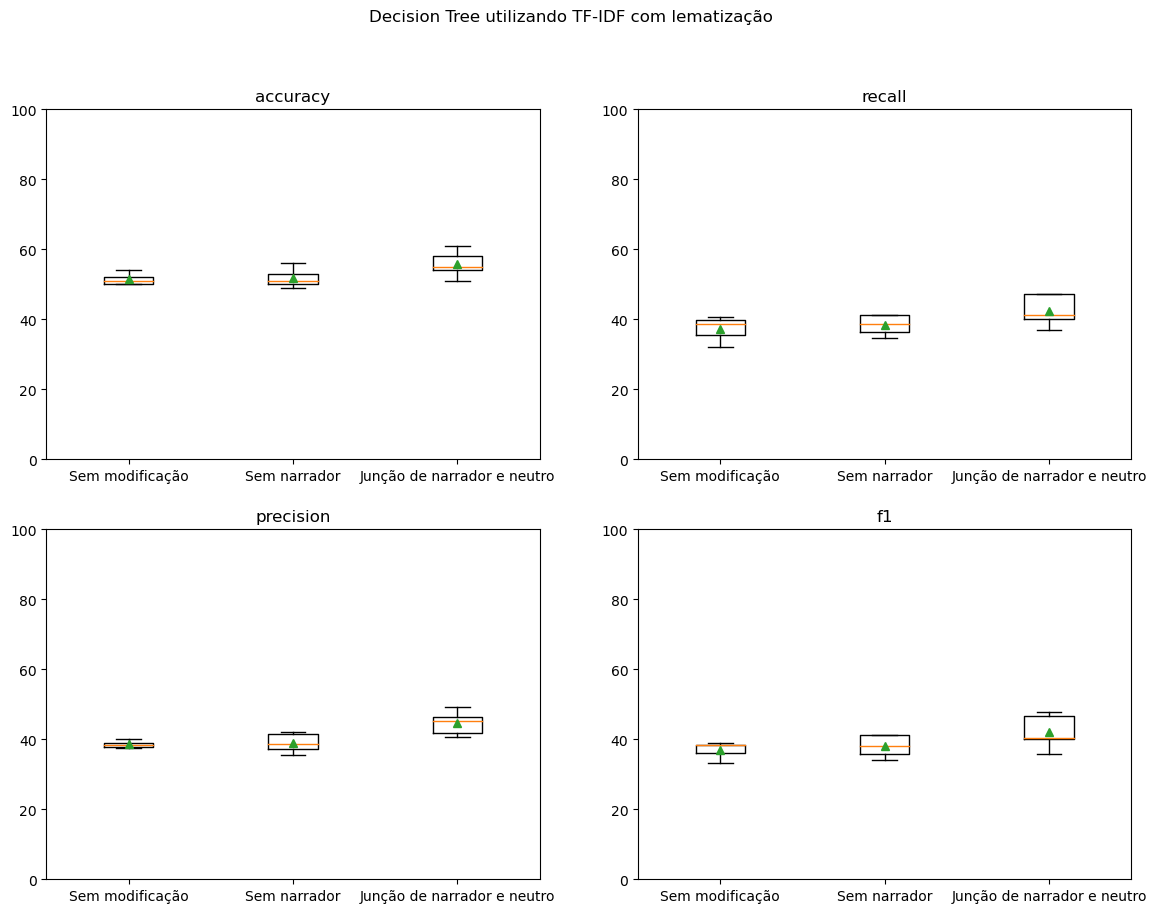

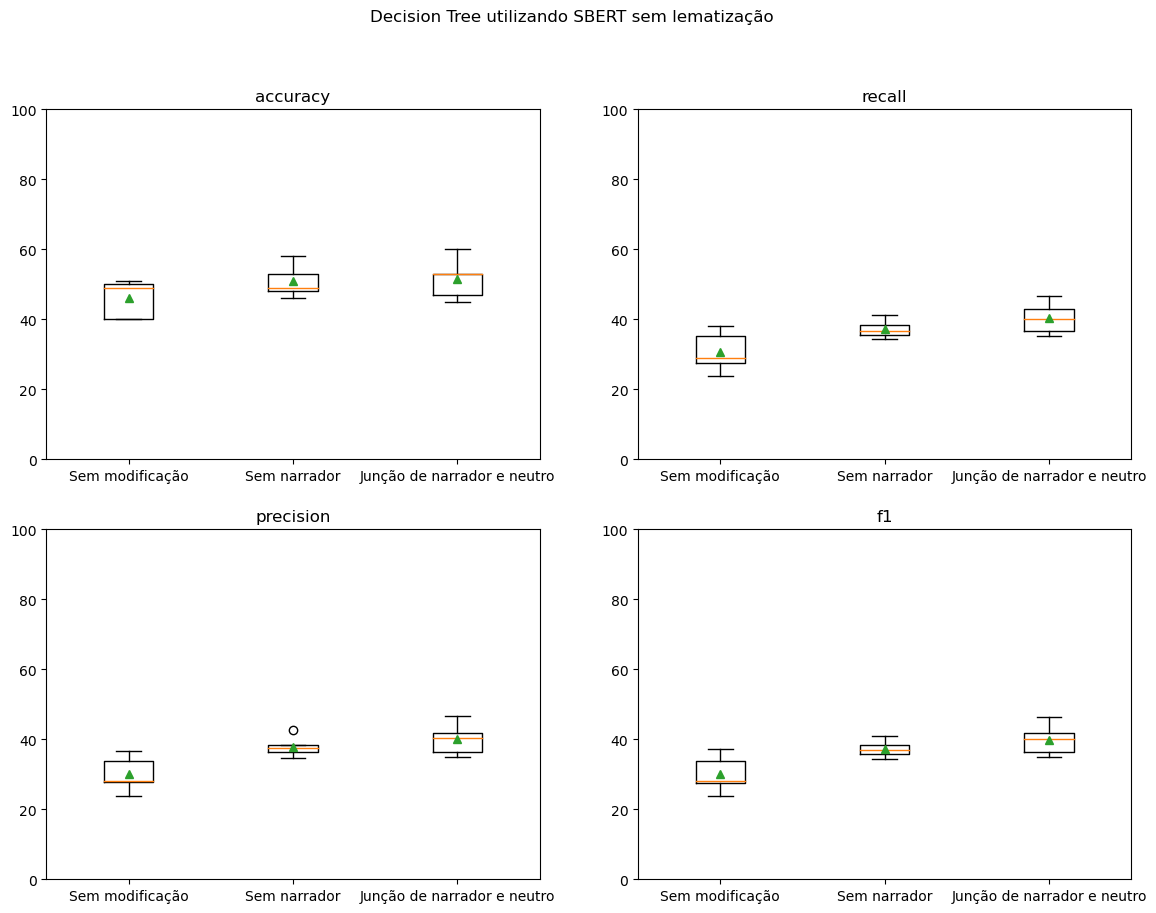

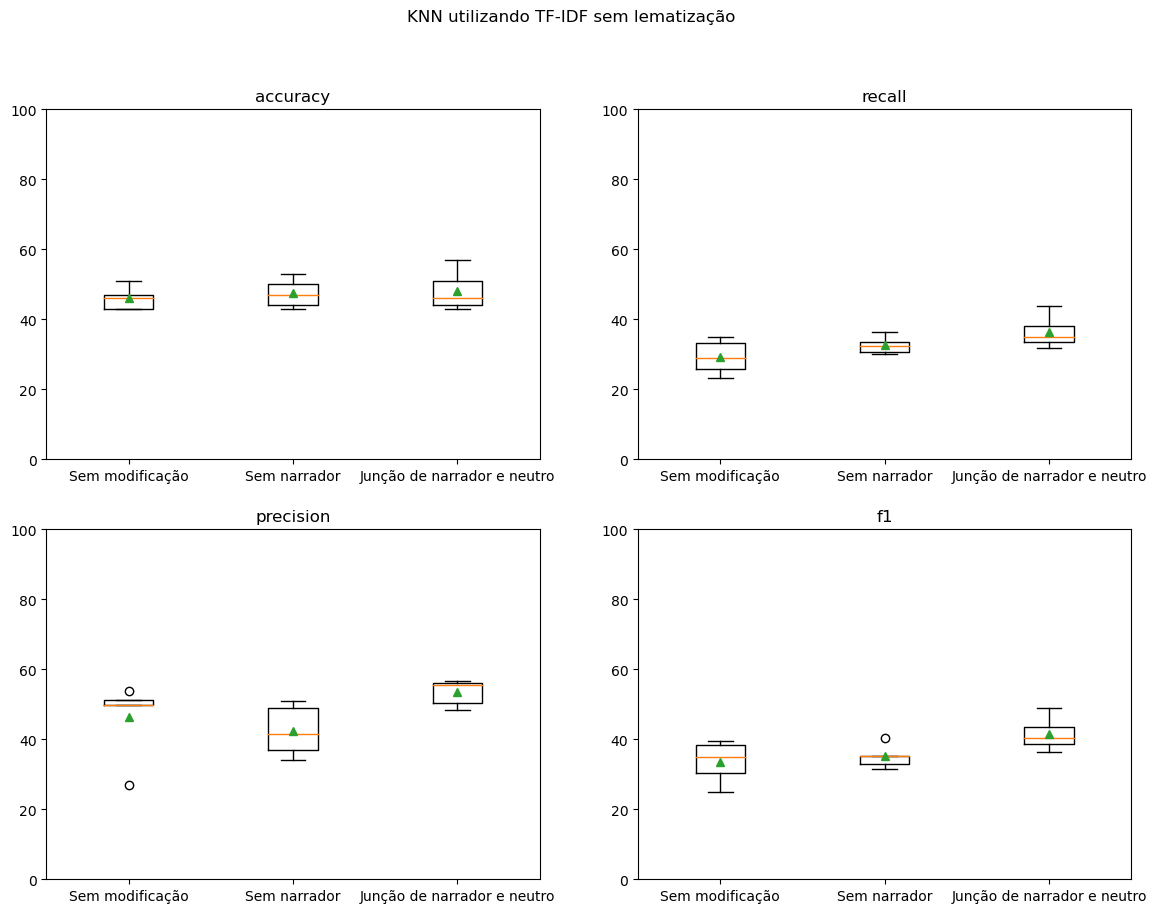

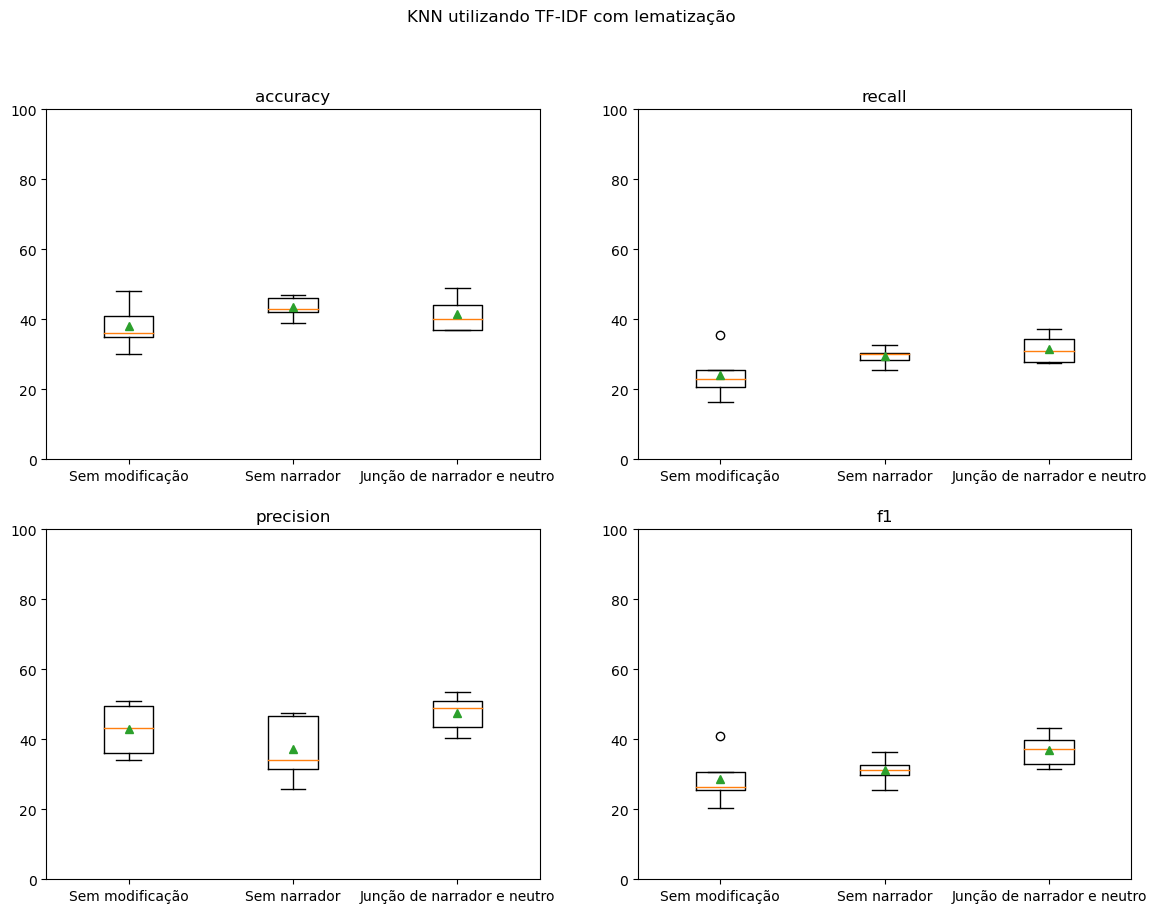

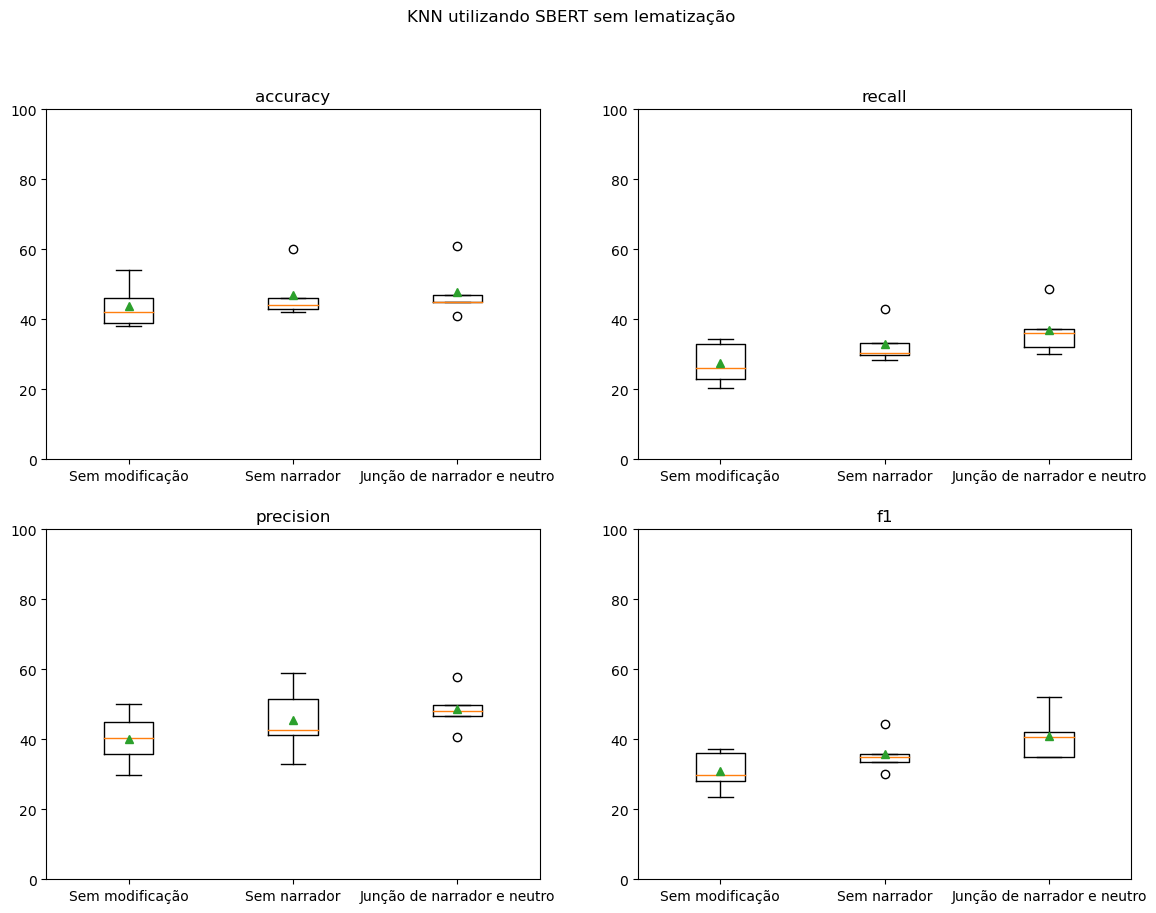

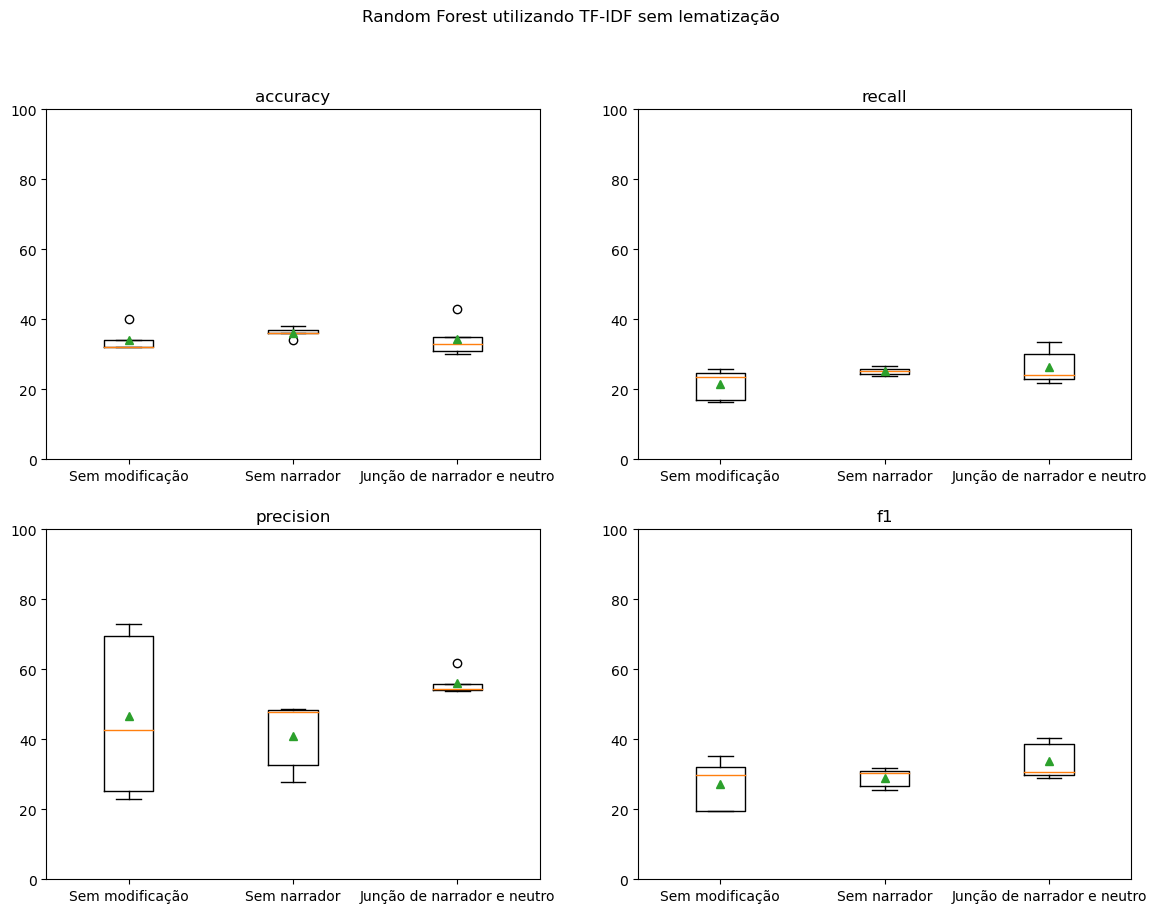

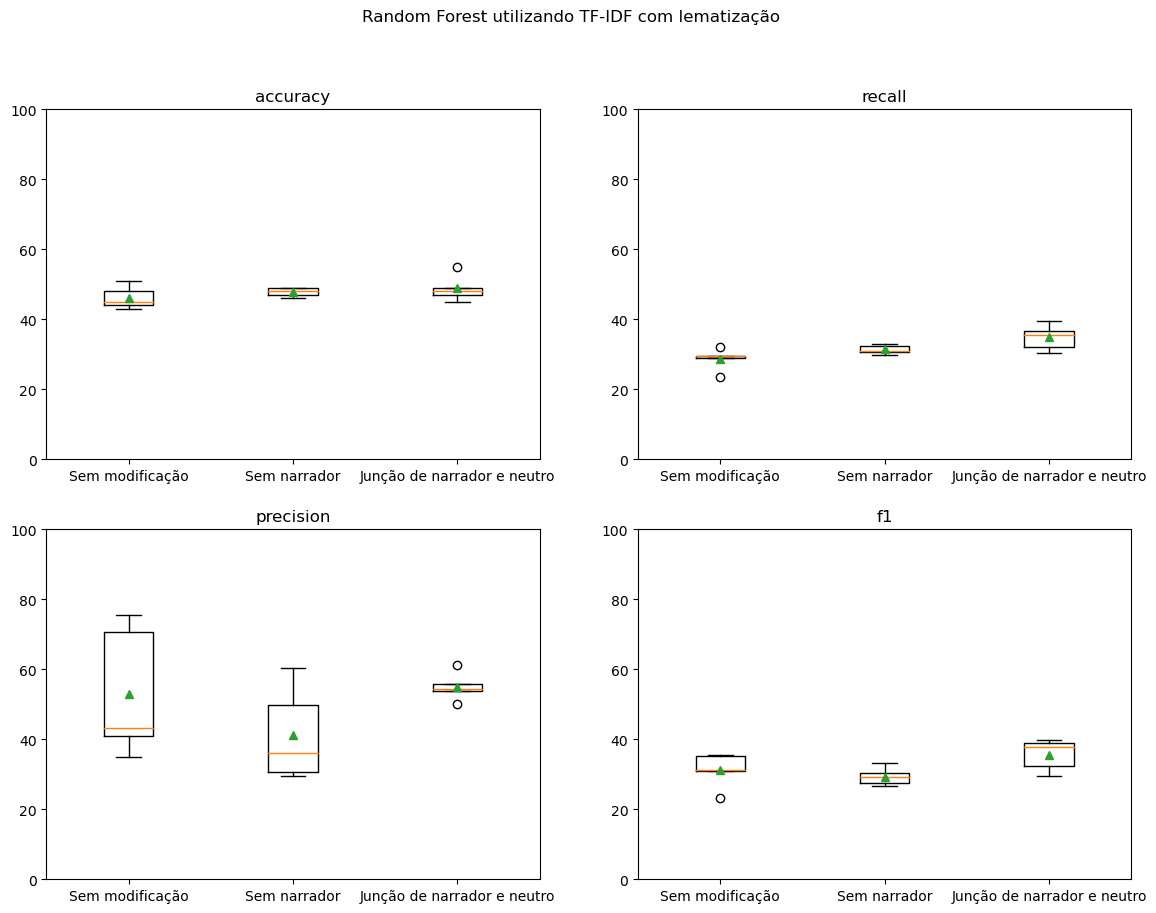

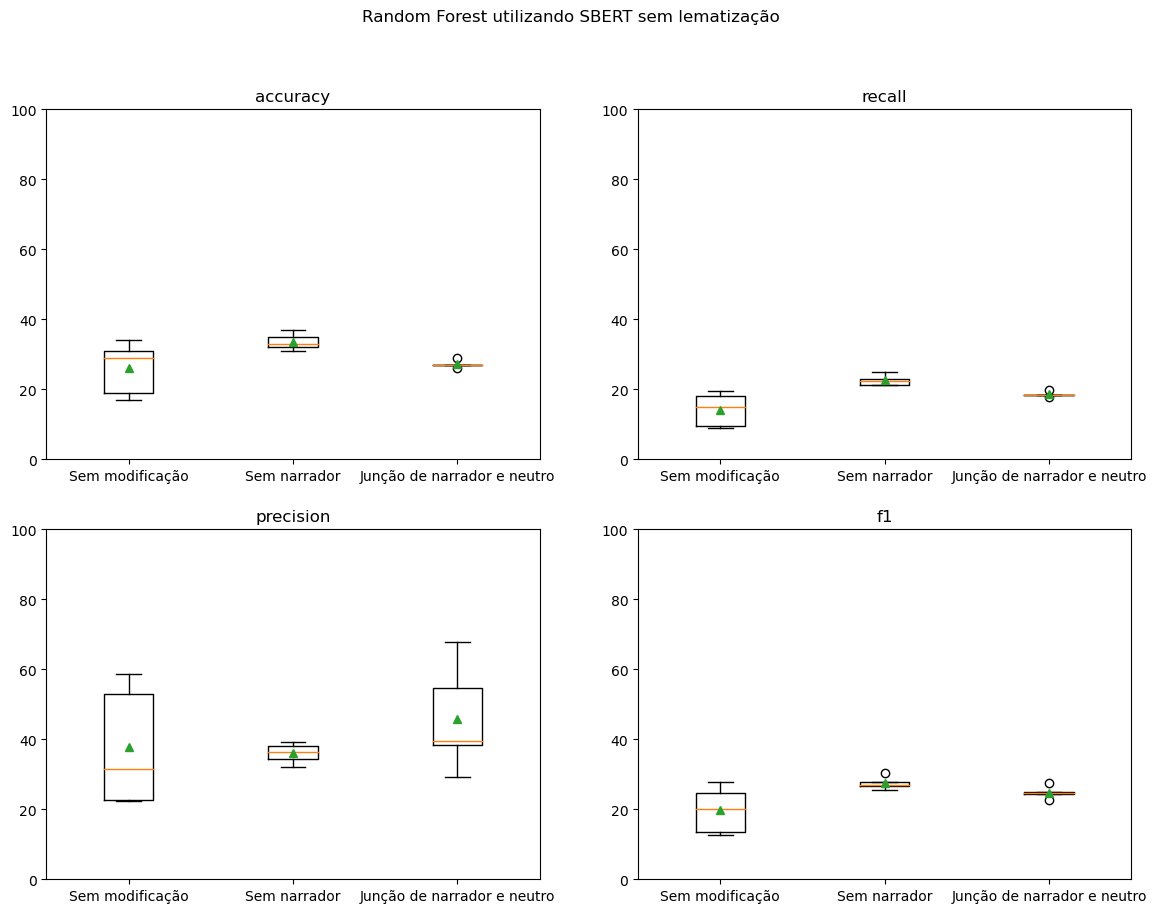

In [12]:
compare_boxplot(metrics, data_operations, width=14, height=10)

In [13]:
metrics

{'Decision Tree': {'TF-IDF sem lematização': {'Sem modificação': {'accuracy': [44,
     61,
     51,
     53,
     50],
    'recall': [36.936564223798264,
     49.66328783621036,
     34.71886108832376,
     36.308278643697015,
     42.93185280675026],
    'precision': [37.86399935468258,
     49.084691903840834,
     37.647782656951215,
     39.996246246246244,
     39.95148856990962],
    'f1': [37.07207207207207,
     47.904761118646896,
     35.95398013594281,
     36.26939539860888,
     41.05429292929293]},
   'Sem narrador': {'accuracy': [42, 47, 49, 42, 42],
    'recall': [34.000525348043084,
     35.704536330790845,
     34.80357305623918,
     30.592471060067457,
     29.98554631040275],
    'precision': [33.024976873265494,
     35.88915792305623,
     34.136752136752136,
     29.92862992862993,
     30.561728395061728],
    'f1': [33.12208979811393,
     35.70206269257025,
     34.362669915143336,
     29.448234402362843,
     29.93645189761695]},
   'Junção de narrador e n

In [14]:
data_operations

['Sem modificação', 'Sem narrador', 'Junção de narrador e neutro']